# Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [33]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Loading Datasets
df=pd.read_csv("train_agriculture.csv")
df.head(30)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [87]:
test=pd.read_csv("test_agriculture.csv")
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [36]:
#Let's drop ID
df.drop('ID',axis=1,inplace=True)

In [37]:
df.describe(include='all')

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [38]:
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [39]:
df.shape

(4599, 9)

In [88]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [89]:
test.shape

(1199, 9)

In [42]:
# Imputing null Values

df['Number_Weeks_Used'] = df.groupby('Number_Doses_Week')['Number_Weeks_Used'].transform(lambda x: x.fillna(x.mean()))

In [43]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [90]:
test['Number_Weeks_Used'] = test.groupby('Number_Doses_Week')['Number_Weeks_Used'].transform(lambda x: x.fillna(x.mean()))

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

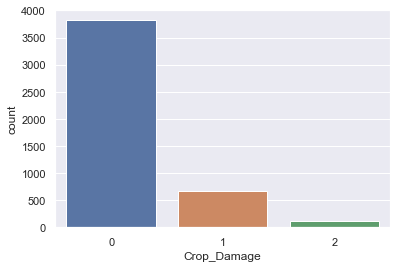

In [45]:
# Let's describe the label - 'Crop_Damage'

sns.countplot(df['Crop_Damage'])
df['Crop_Damage'].value_counts()
# Most of the damaged crops are of Category 0

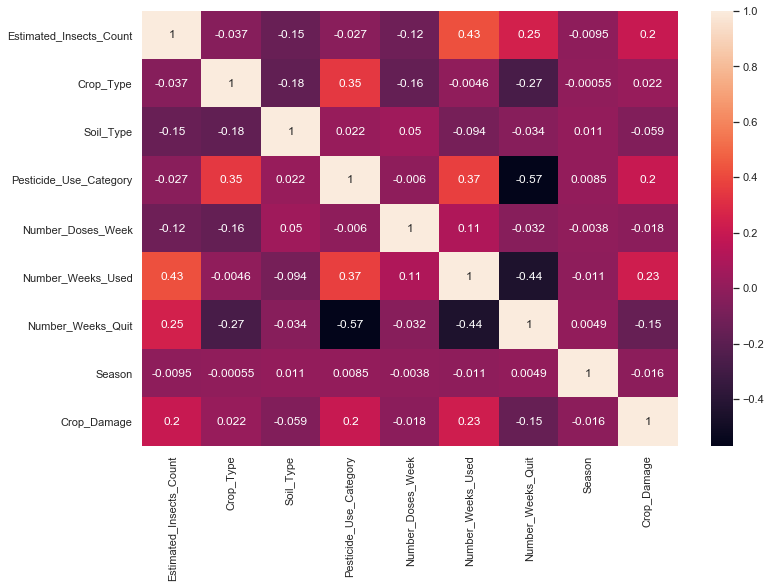

In [46]:
# Let's see the correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [47]:
df.head(1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0


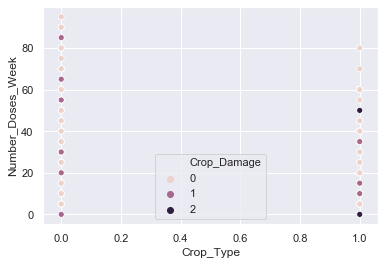

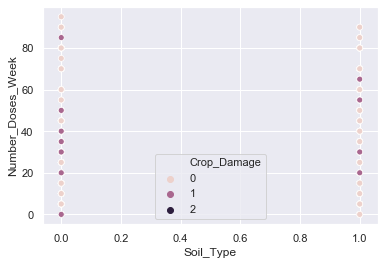

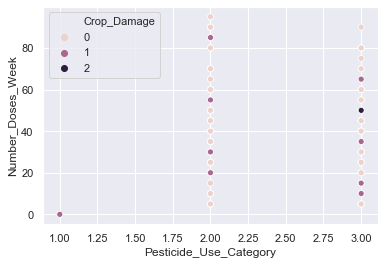

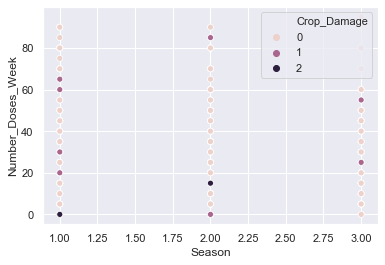

In [48]:
# Let's visualize ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season'] features with respect to Number_Doses_Week hued with 'Crop_Damage'
l=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
for i in l:
    sns.set()
    sns.scatterplot(data=df,x=i,y='Number_Doses_Week',hue='Crop_Damage')
    plt.show()

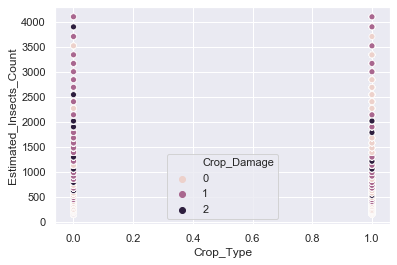

In [49]:
# Let's plot the right ascension and declination hued by class
sns.scatterplot(x='Crop_Type', y='Estimated_Insects_Count', data=df, hue='Crop_Damage')

In [50]:
df.head(1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0


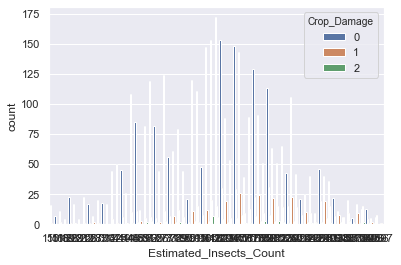

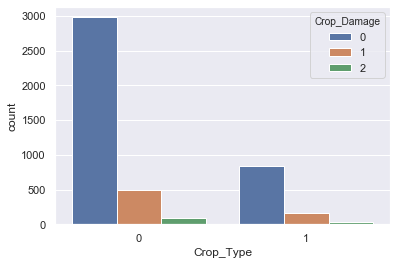

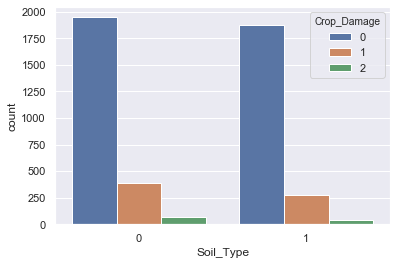

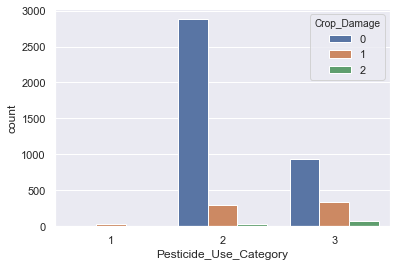

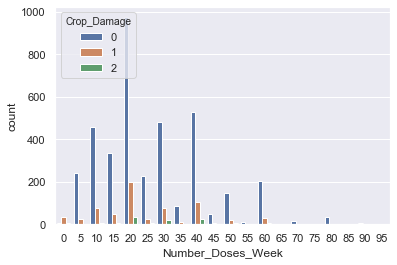

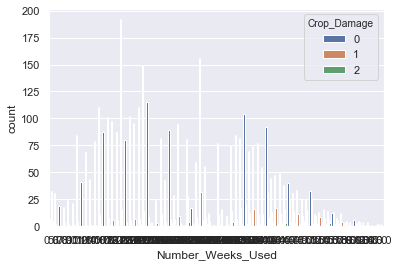

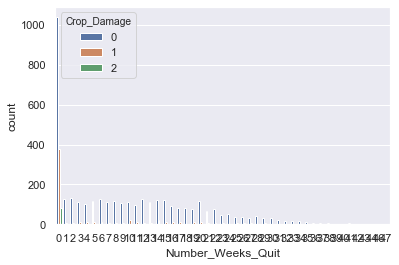

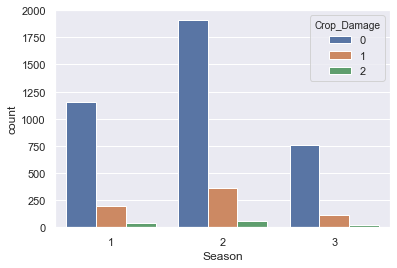

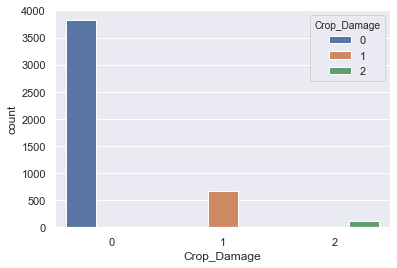

In [51]:
for i in df.columns:
    sns.countplot(df[i],hue=df['Crop_Damage'])
    plt.show()

Observations:
1. Insect Count Follows a normal distribution
2. There are higher no. of Crop Type 0. ALso, Crop Damage - '0' is most dominantand 2 is the least.
3. Equal no. of Soil types.Crop Damage - '0' is most dominantand 2 is the least.
3. Max Pestiside use category is 2, then 3 and then 1. Crop Damage - '0' is most dominantand 2 is the least.
4. Maximum Crop damage occurs in Season 2

In [52]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

# A lot of rows removed

(4599, 9)
(4370, 9)


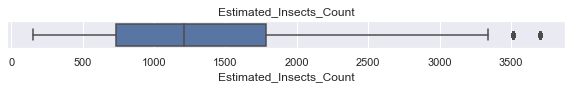

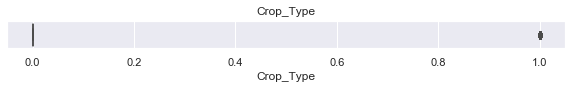

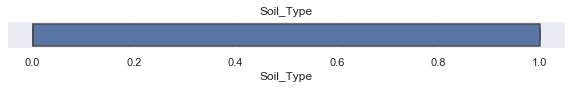

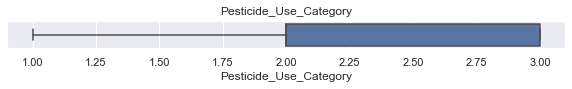

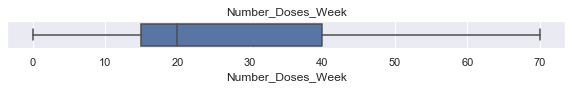

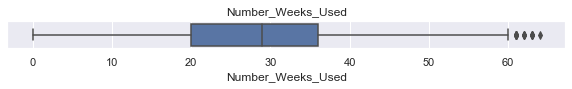

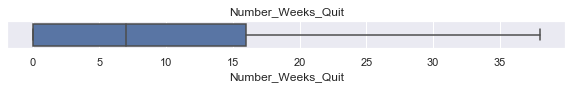

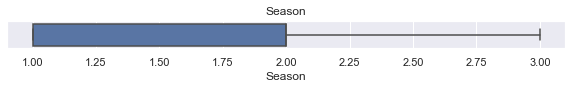

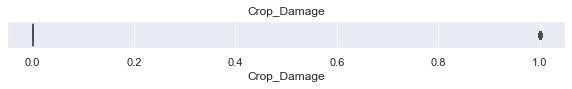

In [53]:
# Let's plot and see
for i in df.columns:
    plt.figure(figsize=(10,0.5))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [54]:
# Checking for skewness in continous features
col=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
df[col].skew()
# We need to treat

Estimated_Insects_Count    0.789806
Number_Doses_Week          0.711083
Number_Weeks_Used          0.257005
Number_Weeks_Quit          0.813382
dtype: float64

In [55]:
# Treating for skewness
for i in col:
    if df[i].skew()>0.55:
            df[i]=np.log1p(df[i])
    if df[i].skew()<-0.55:
            df[i]=np.square(df[i])
df[col].skew()

# Skewness removed to a large extent

Estimated_Insects_Count   -0.543203
Number_Doses_Week         -0.147438
Number_Weeks_Used          0.257005
Number_Weeks_Quit         -0.234282
dtype: float64

In [56]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Crop_Damage"])
y=df[["Crop_Damage"]]

In [57]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.695817,1.848947,-0.960945,-2.743472,-2.789601,-2.435486,-1.298139,-1.288559
1,-2.534195,1.848947,-0.960945,-2.743472,-2.789601,-2.435486,-1.298139,0.147555
2,-2.218420,1.848947,-0.960945,-2.743472,-2.789601,-2.435486,-1.298139,0.147555
3,-2.218420,1.848947,1.040642,-2.743472,-2.789601,-2.435486,-1.298139,0.147555
4,-1.781584,1.848947,-0.960945,-2.743472,-2.789601,-2.435486,-1.298139,0.147555


# Modelling

In [58]:
# For Multi-Class Classification let's focus on 'accuracy' score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
def acc(clf,df_x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max acc score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [59]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print("Mean acc score for classifier: ",c_scores.mean())
    print("standard deviation in acc score for classifier: ",c_scores.std())
    print(c_scores)

In [60]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [64]:
rfc=RandomForestClassifier(n_estimators=200)
r_state=acc(rfc,x,y)

max acc score corresponding to  46  is  0.8638443935926774


In [65]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="accuracy")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 18}

In [66]:
knn=KNeighborsClassifier(n_neighbors=18)
r_state=acc(knn,x,y)

max acc score corresponding to  46  is  0.8729977116704806


In [67]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="accuracy")
clf.fit(x, y)
clf.best_params_

{'criterion': 'entropy'}

In [68]:
dc=DecisionTreeClassifier(criterion="entropy")
r_state=acc(dc,x,y)

max acc score corresponding to  84  is  0.8135011441647597


In [69]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [70]:
svc=SVC(kernel="poly",C=.01,probability=True)
r_state=acc(svc,x,y)

max acc score corresponding to  82  is  0.8661327231121282


In [71]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=acc(lg,x,y)

max acc score corresponding to  42  is  0.8592677345537757


In [72]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=acc(gnb,x,y)

max acc score corresponding to  97  is  0.8558352402745996


In [73]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=acc(gb,x,y)

max acc score corresponding to  64  is  0.8695652173913043


In [74]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)




Random Forest Classifier


Mean acc score for classifier:  0.8370709382151029
standard deviation in acc score for classifier:  0.014117342622596972
[0.81121281 0.84210526 0.85125858 0.83409611 0.84668192]


KNN Classifier


Mean acc score for classifier:  0.8478260869565218
standard deviation in acc score for classifier:  0.006592613405440711
[0.83524027 0.85011442 0.84782609 0.85240275 0.85354691]


SVM Classifier


Mean acc score for classifier:  0.8592677345537758
standard deviation in acc score for classifier:  0.007015885453892848
[0.86727689 0.85354691 0.86842105 0.85354691 0.85354691]


DecisionTree Classifier


Mean acc score for classifier:  0.7624713958810069
standard deviation in acc score for classifier:  0.017270446008341614
[0.75629291 0.77231121 0.76544622 0.73340961 0.78489703]


Logistic Regression Classifier


Mean acc score for classifier:  0.8441647597254004
standard deviation in acc score for classifier:  0.014977636770666875
[0.81464531 0.85354691 0.85354691 0.8

In [75]:
# Selecting SVM Classifier

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 60,test_size=0.20)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score


AUC_Score: 0.5277895055914607


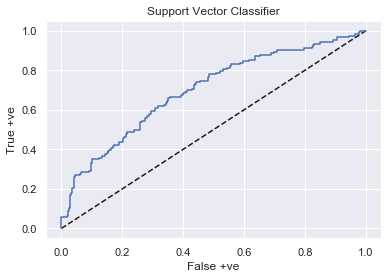

Confusion matrix 
 [[750   1]
 [116   7]]
classification report 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       751
           1       0.88      0.06      0.11       123

    accuracy                           0.87       874
   macro avg       0.87      0.53      0.52       874
weighted avg       0.87      0.87      0.81       874

Accuracy Score: 0.8661327231121282


In [82]:
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Support Vector Classifier')
plt.show()
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('Accuracy Score:',accuracy_score(y_test,y_pred))

# Test

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['ID']=le.fit_transform(test['ID'])
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,1,1,0,0.0,0,2
1,1,410,1,1,1,0,0.0,0,2
2,2,626,1,0,1,0,0.0,0,2
3,3,731,1,0,1,0,0.0,0,2
4,4,789,0,0,1,0,0.0,0,1


In [96]:
test_ss=sc.fit_transform(test)
test_ss=pd.DataFrame(test_ss,columns=test.columns)
test_ss.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.730607,-1.303184,2.036154,1.093604,-2.647391,-1.64457,-2.36574,-0.796004,0.172804
1,-1.727718,-1.040354,2.036154,1.093604,-2.647391,-1.64457,-2.36574,-0.796004,0.172804
2,-1.724829,-0.784627,2.036154,-0.914407,-2.647391,-1.64457,-2.36574,-0.796004,0.172804
3,-1.721939,-0.660316,2.036154,-0.914407,-2.647391,-1.64457,-2.36574,-0.796004,0.172804
4,-1.719050,-0.591648,-0.491122,-0.914407,-2.647391,-1.64457,-2.36574,-0.796004,-1.286296


In [97]:
test_data = test_ss.drop("ID", axis=1).copy()
from sklearn.externals import joblib
joblib.dump(svc,'Agriculture.pkl')
file=joblib.load('Agriculture.pkl')
prediction=file.predict(test_data)

In [98]:
Agri_result = pd.DataFrame({
        "ID": test["ID"],
        "Crop_Damage": prediction
    })

Agri_result.to_csv('Agri_result.csv', index=False)

In [99]:
Agri = pd.read_csv('Agri_result.csv')
Agri.head()

,ID,Crop_Damage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
